In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [42]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='ELU'),
    Dropout(0.2),
    Dense(64, activation='ELU'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [43]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/40
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5479 - accuracy: 0.8026 - val_loss: 0.4561 - val_accuracy: 0.8390
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4293 - accuracy: 0.8425 - val_loss: 0.4317 - val_accuracy: 0.8448
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3923 - accuracy: 0.8560 - val_loss: 0.3781 - val_accuracy: 0.8639
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3699 - accuracy: 0.8633 - val_loss: 0.3636 - val_accuracy: 0.8682
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3536 - accuracy: 0.8691 - val_loss: 0.3668 - val_accuracy: 0.8669
Epoch 6/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3394 - accuracy: 0.8742 - val_loss: 0.3649 - val_accuracy: 0.8649
Epoch 7/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3296 - accuracy: 0.8779 - val_loss: 0.3803 - val_accu

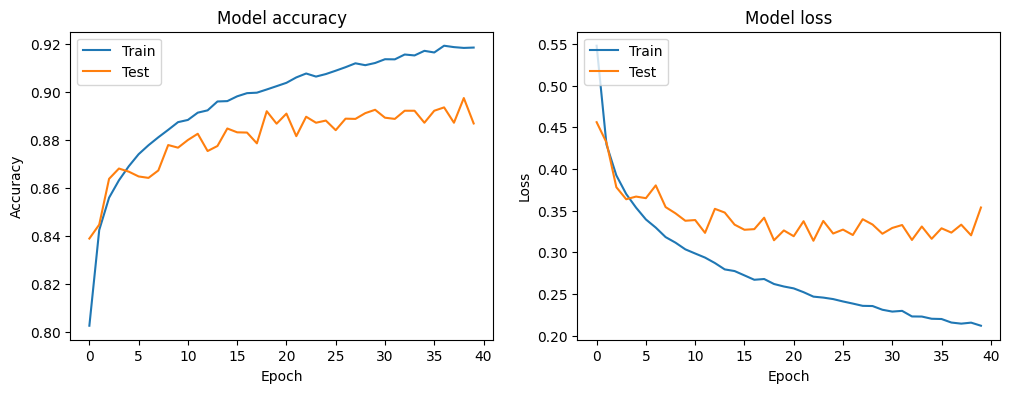

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [45]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3537 - accuracy: 0.8870
Test accuracy: 0.8870000243186951
